In [1]:
import numpy as np
import pandas as pd
import sys; sys.path.append('..')

from helpers.lift import area_ratio_scorer, area_ratio, plot_lift_chart

df = pd.read_csv('../data/engineered.csv')
df.head()

,Unnamed: 0,X1,X3,X5,X6,X7,X8,X9,X10,X11,...,payment_total,payment_avg,payment_std,payment_max,payment_min,payment_growth,payment_trend,payment_zero_count,payment_all_zero,payment_low_count
0,0,20000,2,24,2,2,-1,-1,-2,-2,...,689,114.833336,281.28308,689,0,0,59.057144,5,0,6
1,1,120000,2,26,-1,2,0,0,0,2,...,5000,833.333300,752.77264,2000,0,-2000,-200.000000,2,0,2
2,2,90000,2,34,0,0,0,0,0,0,...,11018,1836.333400,1569.81540,5000,1000,-3482,-454.571440,0,0,0
3,3,50000,2,37,0,0,0,0,0,0,...,8388,1398.000000,478.05817,2019,1000,1000,227.142850,0,0,0
4,4,50000,2,57,-1,0,-1,0,0,0,...,59049,9841.500000,13786.23000,36681,679,1321,3302.314200,0,0,2


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('Y', axis=1)
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=df['Y'])

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the pipeline
gb_pipeline = Pipeline([
    ('gb_clf', GradientBoostingClassifier())
])

# Define parameter distributions (use scipy.stats for continuous ranges)
param_distributions = {
    'gb_clf__loss': ['log_loss', 'exponential'],
    'gb_clf__learning_rate': uniform(0.01, 0.3),  # Range: 0.01 to 0.31
    'gb_clf__n_estimators': randint(100, 500),    # Integers from 100 to 499
    'gb_clf__subsample': uniform(0.6, 0.4),        # Range: 0.6 to 1.0
    'gb_clf__criterion': ['friedman_mse', 'squared_error'],
    'gb_clf__min_samples_split': randint(2, 11),
    'gb_clf__min_samples_leaf': randint(1, 6),
    'gb_clf__min_weight_fraction_leaf': [0.0, 0.01],
    'gb_clf__max_depth': [3, 5, 8, None],
    'gb_clf__min_impurity_decrease': [0.0, 0.01],
    'gb_clf__init': [None],
    'gb_clf__random_state': [42],
    'gb_clf__max_features': ['sqrt', 'log2', None],
    'gb_clf__verbose': [0],
    'gb_clf__max_leaf_nodes': [None, 50, 100],
    'gb_clf__warm_start': [False, True],
    'gb_clf__validation_fraction': [0.1, 0.2],
    'gb_clf__n_iter_no_change': [None, 5, 10],
    'gb_clf__tol': [1e-4, 1e-3],
    'gb_clf__ccp_alpha': [0.0, 0.01],
}

# RandomizedSearchCV setup
random_search_gb = RandomizedSearchCV(
    estimator=gb_pipeline,
    param_distributions=param_distributions,
    n_iter=100,  # Try 100 random combinations
    scoring=area_ratio_scorer,  # Replace with your custom scorer
    cv=10,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Run the randomized search
random_search_gb.fit(X_train, y_train)

# Output results
print("Best Params:", random_search_gb.best_params_)
print("Best CV Area Ratio:", random_search_gb.best_score_)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END gb_clf__ccp_alpha=0.0, gb_clf__criterion=squared_error, gb_clf__init=None, gb_clf__learning_rate=0.2952142919229748, gb_clf__loss=log_loss, gb_clf__max_depth=None, gb_clf__max_features=sqrt, gb_clf__max_leaf_nodes=None, gb_clf__min_impurity_decrease=0.0, gb_clf__min_samples_leaf=2, gb_clf__min_samples_split=4, gb_clf__min_weight_fraction_leaf=0.0, gb_clf__n_estimators=430, gb_clf__n_iter_no_change=10, gb_clf__random_state=42, gb_clf__subsample=0.9464704583099741, gb_clf__tol=0.001, gb_clf__validation_fraction=0.2, gb_clf__verbose=0, gb_clf__warm_start=True; total time=   3.2s
[CV] END gb_clf__ccp_alpha=0.0, gb_clf__criterion=squared_error, gb_clf__init=None, gb_clf__learning_rate=0.2952142919229748, gb_clf__loss=log_loss, gb_clf__max_depth=None, gb_clf__max_features=sqrt, gb_clf__max_leaf_nodes=None, gb_clf__min_impurity_decrease=0.0, gb_clf__min_samples_leaf=2, gb_clf__min_samples_split=4, gb_clf__min_weight_fra

Best Params: {'gb_clf__ccp_alpha': 0.0, 'gb_clf__criterion': 'squared_error', 'gb_clf__init': None, 'gb_clf__learning_rate': np.float64(0.015362180420024144), 'gb_clf__loss': 'exponential', 'gb_clf__max_depth': 8, 'gb_clf__max_features': 'sqrt', 'gb_clf__max_leaf_nodes': 100, 'gb_clf__min_impurity_decrease': 0.0, 'gb_clf__min_samples_leaf': 1, 'gb_clf__min_samples_split': 9, 'gb_clf__min_weight_fraction_leaf': 0.01, 'gb_clf__n_estimators': 239, 'gb_clf__n_iter_no_change': 10, 'gb_clf__random_state': 42, 'gb_clf__subsample': np.float64(0.9799844735800901), 'gb_clf__tol': 0.0001, 'gb_clf__validation_fraction': 0.1, 'gb_clf__verbose': 0, 'gb_clf__warm_start': False}
Best CV Area Ratio: 0.5750010228951132

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
import numpy as np

# Drop any label-based columns from X_train/X_test
X_train = X_train.drop(columns=[col for col in X_train.columns if X_train[col].dtype == 'object'])
X_test = X_test.drop(columns=[col for col in X_test.columns if X_test[col].dtype == 'object'])


gb_optimized_pipeline = Pipeline([
    ('dt_clf', GradientBoostingClassifier(
                                        ccp_alpha=0.0,
                                        criterion='squared_error',
                                        init=None, 
                                        learning_rate=np.float64(0.015362180420024144),
                                        n_estimators=239,
                                        loss='exponential', 
                                        max_features='sqrt',
                                        max_leaf_nodes=100,
                                        min_impurity_decrease=0.0, 
                                        min_samples_leaf=1,
                                        min_samples_split=9,
                                        min_weight_fraction_leaf=0.01,
                                        n_iter_no_change=10,
                                        max_depth=8,
                                        random_state=42, 
                                        subsample=np.float64(0.9799844735800901),
                                        verbose=0,
                                        tol=0.0001,
                                        validation_fraction=0.1, 
                                        warm_start=False
        ))
])

gb_optimized_pipeline.fit(X_train, y_train)


,steps,"[('dt_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,loss,'exponential'
,learning_rate,np.float64(0....2180420024144)
,n_estimators,239
,subsample,np.float64(0.9799844735800901)
,criterion,'squared_error'
,min_samples_split,9
,min_samples_leaf,1


In [6]:
from sklearn.metrics import accuracy_score, classification_report

y_train_pred_optimized = gb_optimized_pipeline.predict(X_train)
y_train_proba_optimized = gb_optimized_pipeline.predict_proba(X_train)[:, 1]

y_test_pred_optimized = gb_optimized_pipeline.predict(X_test)
y_test_proba_optimized = gb_optimized_pipeline.predict_proba(X_test)[:, 1]

train_optimized_error = 1 - accuracy_score(y_train, y_train_pred_optimized)
train_optimized_area = area_ratio(y_train, y_train_proba_optimized)

test_optimized_error = 1 - accuracy_score(y_test, y_test_pred_optimized)
test_optimized_area = area_ratio(y_test, y_test_proba_optimized)

In [7]:
print(f'TRAIN: Error Rate {train_optimized_error:.4f}\n')
print(f'TRAIN: Area Ratio {train_optimized_area:.4f}\n')
print("TRAIN: Classification Report")
print(classification_report(y_train, y_train_pred_optimized, digits=4, zero_division=0))

TRAIN: Error Rate 0.1723

TRAIN: Area Ratio 0.6650

TRAIN: Classification Report
              precision    recall  f1-score   support

           0     0.8432    0.9567    0.8964     16334
           1     0.7103    0.3741    0.4900      4641

    accuracy                         0.8277     20975
   macro avg     0.7768    0.6654    0.6932     20975
weighted avg     0.8138    0.8277    0.8065     20975



In [8]:
print(f'TEST: Error Rate {test_optimized_error:.4f}\n')
print(f'TEST: Area Ratio {test_optimized_area:.4f}\n')
print("TEST: Classification Report")
print(classification_report(y_test, y_test_pred_optimized, digits=4, zero_division=0))

TEST: Error Rate 0.1780

TEST: Area Ratio 0.5619

TEST: Classification Report
              precision    recall  f1-score   support

           0     0.8383    0.9559    0.8932      7001
           1     0.6931    0.3509    0.4660      1989

    accuracy                         0.8220      8990
   macro avg     0.7657    0.6534    0.6796      8990
weighted avg     0.8062    0.8220    0.7987      8990



In [9]:
sorted_idx = np.argsort(-y_test_proba_optimized)
y_true_sorted = y_test.iloc[sorted_idx].reset_index(drop=True)

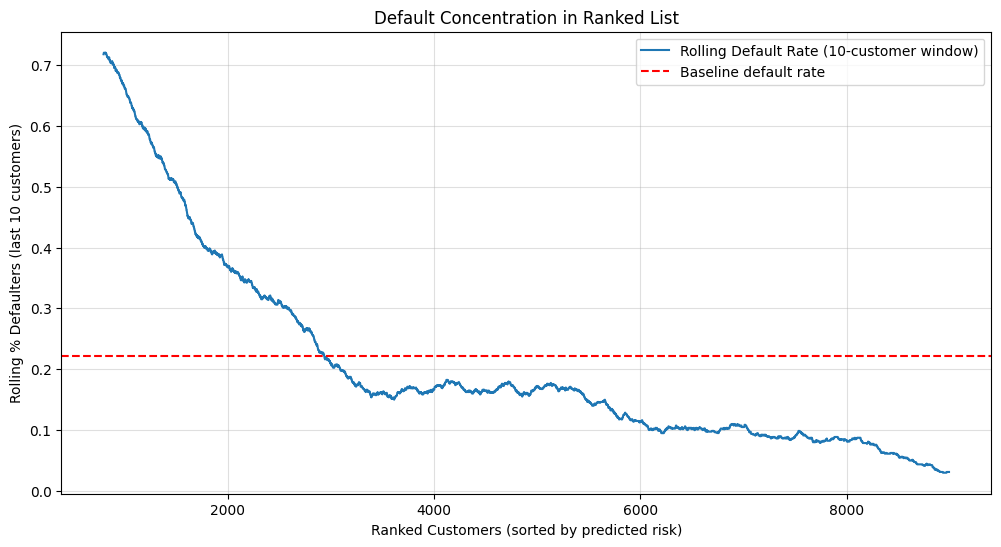

In [10]:
window_size = 800  # rolling over 10 customers
rolling_default_rate = y_true_sorted.rolling(window=window_size).mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(
    rolling_default_rate.values,
    label="Rolling Default Rate (10-customer window)"
)

# Baseline average default rate in test set
plt.axhline(y=y_test.mean(), color="red", linestyle="--", label="Baseline default rate")

plt.xlabel("Ranked Customers (sorted by predicted risk)")
plt.ylabel("Rolling % Defaulters (last 10 customers)")
plt.title("Default Concentration in Ranked List")
plt.legend()
plt.grid(alpha=0.4)
plt.show()


In [11]:
import pandas as pd
import numpy as np

# Total number of customers
n = len(y_true_sorted)

# Total defaults
total_defaults = y_true_sorted.sum()

decile_results = []

# For each decile (10%, 20%, ..., 100%)
for d in range(5, 110, 5):
    cutoff = int((d/100) * n)  # number of customers in top d%
    captured_defaults = y_true_sorted.iloc[:cutoff].sum()
    captured_pct = (captured_defaults / total_defaults) * 100
    decile_results.append({"Top % Population": f"Top {d}%", 
                           "Defaults Captured (%)": round(captured_pct, 2)})

# Create table
decile_df = pd.DataFrame(decile_results)
print(decile_df)


   Top % Population  Defaults Captured (%)
0            Top 5%                  17.30
1           Top 10%                  32.23
2           Top 15%                  42.63
3           Top 20%                  50.93
4           Top 25%                  57.97
5           Top 30%                  63.70
6           Top 35%                  67.37
7           Top 40%                  70.99
8           Top 45%                  74.91
9           Top 50%                  78.53
10          Top 55%                  82.60
11          Top 60%                  85.92
12          Top 65%                  88.44
13          Top 70%                  90.60
14          Top 75%                  92.61
15          Top 80%                  94.72
16          Top 85%                  96.73
17          Top 90%                  98.64
18          Top 95%                  99.45
19         Top 100%                 100.00
20         Top 105%                 100.00


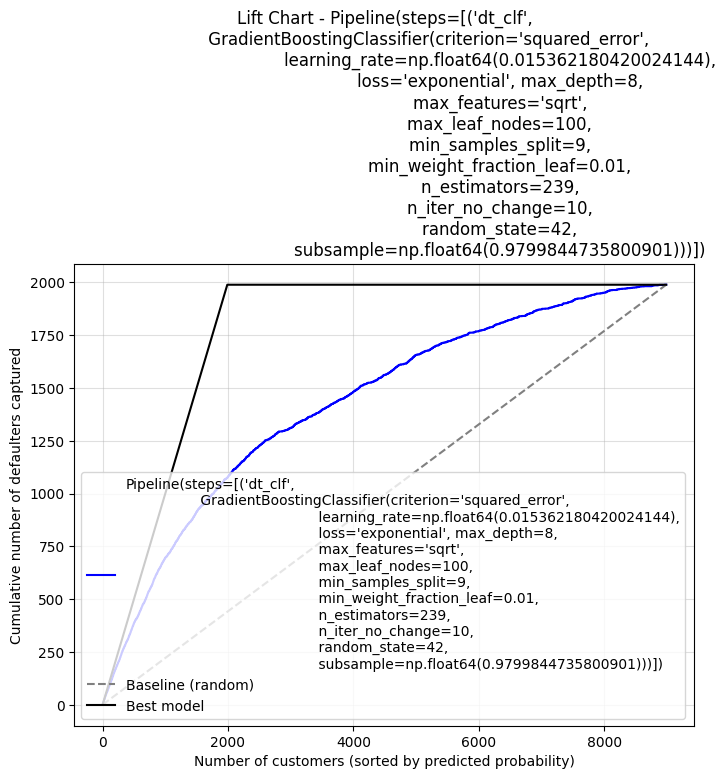

In [13]:
plot_lift_chart(y_test, y_test_proba_optimized, gb_optimized_pipeline)